Exemple extrait de [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

 Les modèles de régression linéaire constituent un bon point de départ pour les tâches de régression. Ces modèles sont populaires car ils peuvent être ajustés très rapidement et sont très faciles à interpréter. Vous connaissez probablement la forme la plus simple d'un modèle de régression linéaire (c'est-à-dire l'ajustement d'une ligne droite aux données), mais ces modèles peuvent être étendus pour modéliser des comportements de données plus complexes.

# Régression Linéaire

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import linear_model

import seaborn as sns; sns.set()

## Régression linéaire simple

Commençons avec une régression linéaire simple sur des données synthétiques. La cellule suivante génère les données :

(100, 3)


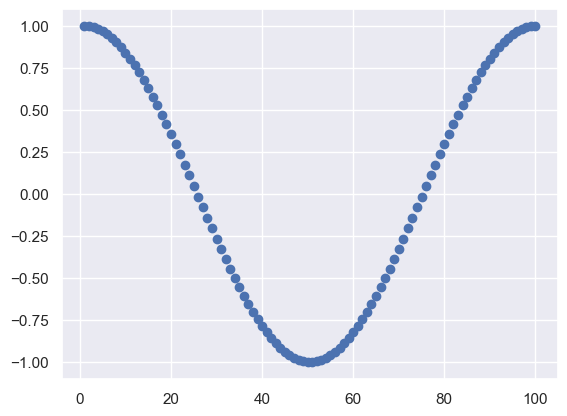

In [3]:
np.random.seed(42)
n_obs = 100

## Quelques features
X1 = np.cos(np.linspace(0, 2 * np.pi, n_obs))
X2 = np.arange(1, n_obs+1)

plt.scatter(X2, X1);

## Matrice de design
X = np.stack((np.ones(n_obs), X1, X2), axis=1)
print(X.shape)

## "Vrai" beta
beta  = np.array([2, -2, 0.5])

## The true response
Ytheo = X @ beta

## The observed response (true + noise)
Y = Ytheo + np.random.normal(0, 0.5, n_obs)

### Votre propre régression linéaire

Calculez l'estimateur des moindres carrés $\hat{\beta}$ (en suivant la formule donnée p110 du cours).

In [4]:
bhat = np.linalg.inv(X.T @ X) @ X.T @ Y
print(bhat)

[ 1.91270646 -1.98095174  0.50069663]


Calculez les valeurs prédites par votre modèle $\hat{Y} = X \hat{\beta}$.

In [5]:
Y_hat = X @ bhat

Comparez les valeurs prédites $\hat Y$ aux valeurs observées $Y$. Calculez le coefficient de détermination $R^2$.

0.9990356988259504
0.9990356988259501


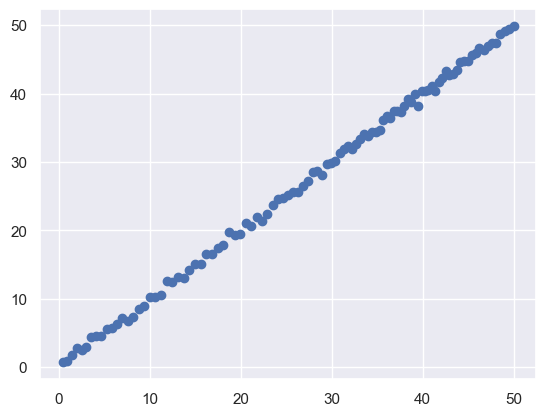

In [ ]:
plt.scatter(Y_hat, Y);
R_square1 = 1 - np.sum((Y - Y_hat)**2) / np.sum((Y - np.mean(Y))**2);
# R square using correlation
R_square2 = np.corrcoef(Y_hat, Y)[0, 1]**2;
print(R_square1);
print(R_square2);

### Avec `scikit-learn`

Effectuez une régression linéaire avec la classe [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) et utilisez la méthode `score` pour calculer le $R^2$. Comparez à celui obtenu précédemment.

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y);
Rsquare3 = reg.score(X, Y);
print(reg.coef_);
print(reg.intercept_);
print(Rsquare3);
print(reg.predict(X));
print(R_square2-Rsquare3);


[ 0.         -1.98095174  0.50069663]
1.9127064607425162
0.9990356988259504
[ 0.43245135  0.93713627  1.44978173  1.97033961  2.49872994  3.0348412
  3.57853079  4.1296256   4.68792268  5.2531901   5.82516787  6.40356894
  6.98808044  7.57836487  8.1740615   8.77478779  9.38014096  9.98969959
 10.60302533 11.21966467 11.83915075 12.46100524 13.08474028 13.70986045
 14.33586472 14.96224854 15.5885058  16.21413092 16.83862085 17.46147712
 18.08220783 18.70032966 19.31536977 19.92686774 20.53437742 21.13746869
 21.73572927 22.32876629 22.91620793 23.4977049  24.07293184 24.64158865
 25.20340167 25.75812481 26.30554053 26.84546071 27.37772739 27.90221347
 28.41882316 28.92749236 29.42818899 29.92091304 30.40569662 30.8826038
 31.35173037 31.81320346 32.267181   32.71385111 33.15343135 33.5861678
 34.01233412 34.43223041 34.84618203 35.25453827 35.65767096 36.05597294
 36.44985652 36.83975181 37.22610496 37.60937639 37.99003893 38.36857592
 38.74547925 39.1212474  39.49638339 39.87139284 40

Affichez les paramètres du modèle et comparez avec $\beta$.

In [17]:
print(reg.n_features_in_);
print(reg.get_params());

3
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Utilisez la méthode `predict` pour calculer les valeurs prédites par votre modèle et comparez avec les valeurs observées. Calculez $R^2$ avec la fonction [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

0.9990356988259504


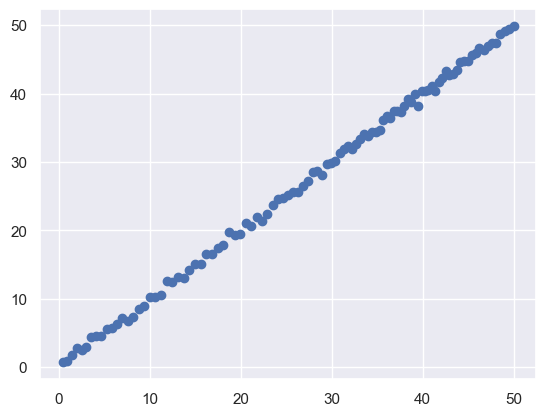

In [25]:
from sklearn.metrics import r2_score
y_pred = reg.predict(X);
R_square4 = r2_score(Y, y_pred);
print(R_square4);
plt.scatter(y_pred, Y);

Nous aurions aussi pu faire une régression linéaire plus simple, à savoir l'ajustement en ligne droite des données.
Un ajustement en ligne droite est un modèle de la forme
$$
y = ax + b
$$
où $a$ est la pente, et $b$ est l'ordonnée à l'origine.

Considérons les données suivantes, qui sont dispersées autour d'une ligne ayant une pente de 2 et une ordonnée à l'origine de -5 :

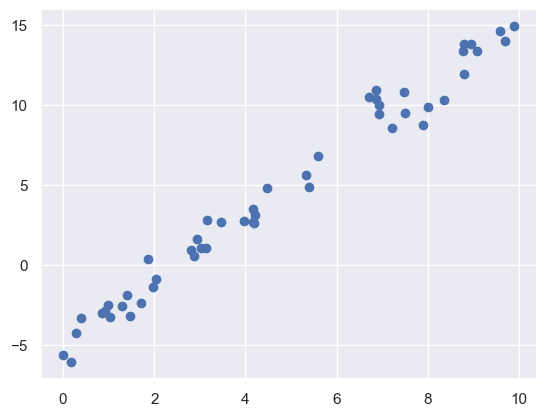

In [27]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Utilisez l'estimateur ``LinearRegression`` de Scikit-Learn pour ajuster ces données et construire la courbe la mieux ajustée comme fait juste au dessus. Affichez de même les paramètres pertinents du modèle.

coefficient :  [2.02720881]
ordonnée à l'origine :  -4.9985770855532


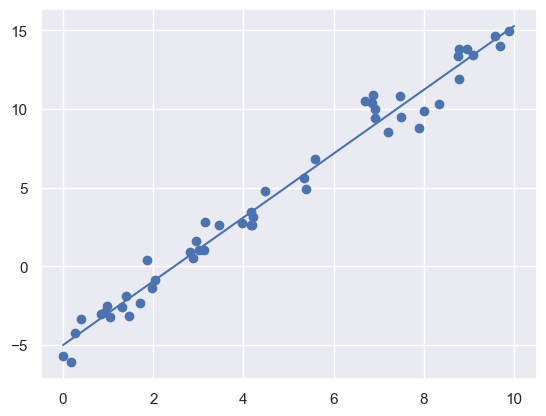

In [37]:
model = LinearRegression().fit(x[:, np.newaxis], y)
# print(x);
# print(x[:, np.newaxis]);
#construire la courbe
print("coefficient : ", model.coef_);
print("ordonnée à l'origine : ", model.intercept_);
xfit = np.linspace(0, 10, 2)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);


## Les modèles linéaires avec `statsmodels`

Nous allons utiliser la librairie `statsmodels` qui donne des sorties plus complètes pour la régression, proche de ce qu'on peut obtenir avec R. 

Le modèle de régression est spécifié via une formule, qui est une chaîne de caractère du type `y ~ x1 + x2` pour fitter un modèle de régression de `y` en fonction des variables `x1` et `x2`. Plus d'informations sur cette page : https://www.statsmodels.org/stable/example_formulas.html

### Données

Utilisons à nouveau le jeu de données iris.

In [ ]:
iris = sns.load_dataset("iris")
iris.head()


Faites un [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) en colorant différemment les espèces d'iris.

### Ajustement d'un modèle avec `statsmodels`

Utiliser [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) en utilisant une formule précisant  calculer les paramètres de la régression de la largeur les pétales en fonction de le leur longueur.
Afficher le resultat avec [summary](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.summary.html)

Utiliser [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) en utilisant une formule (comme dans l'exemple de la p117 du cours) pour prédire la largeur des pétales en fonction de l'ensemble des autres paramètres numériques.

On peut obtenir les résidus du modèle à l'aide l'attribut [resid](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html) d'un OLSModel

In [ ]:
iris['residus'] = fit.resid

Histogramme des résidus

In [ ]:
plt.hist(iris['residus'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

### Inspection du modèle

Inspecter les résidus pour vérifier les hypothèses du modèle linéaire (hétéroscedasticité, ...) et détecter d'éventuelles observations aberrantes

(cf cours)

- white noise → plot residuals vs fitted values; il ne doit pas y avoir de relation franche entre les résidus et $\hat{Y}$ (adéquation au modèle)
- homoscedasticity → plot sqrt(abs(residuals)) vs fitted values; il ne doit pas y avoir de structure dans le nuage de points
- normality (if gaussian noise): using qq plot

Quelques exemples de graphiques qu'on peut produire : https://www.andrew.cmu.edu/user/achoulde/94842/homework/regression_diagnostics.html

Affichez les 3 graphiques vus en cours et commentez.

### Variables significatives

Dans cette partie, nous allons apprendre à lire l'output de statsmodels pour retirer les variables non significatives. Nous utiliserons les données "ozone".
Commencez par charger les données.
On trouve dans ce fichier des variables telles que :
- MaxO3, qui est la valeur maximale d'ozone observée sur une journée ;
- T9, T12 et T15 qui sont les températures prises respectivement à 9 h, 12 h et 15 h ;
- Ne9, Ne12, Ne15 qui sont des nébulosités prises à 9 h, 12 h et 15 h ;
- Vx9, Vx12 et Vx15 qui sont les composantes est-ouest du vent mesurées à 9 h, 12 h et 15 h ;
- MaxO3V, qui donne la teneur maximale en ozone observée la veille ;
- vent, l'orientation du vent à 12 h ;
- pluie, la présence ou non de pluie.

In [ ]:
# Attention au séparateur des colonnes, et au séparateur des valeurs décimales

Utiliser la commande [ols](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html#statsmodels-formula-api-ols)  pour calculer la régression de maxO3 en fonction des autres variables de l'échantillon et affichez le résultat avec `summary` sans prendre en comptes les informations sur le vent ni sur la pluie.

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

Le $R^{2}$ vaut environ 0.75, et le $R^{2}$ ajusté est d'environ 0.74.

Nous allons retirer les variables non significatives en commençant par la moins significative (Ne15). Modifiez la formule en ce sans et recalculez la régression.

Continuez à envelever les variables non significatives de la formule jusqu'à ce qu'elles soient toutes significatives.

On remarque qu'à présent, tous les paramètres sont significatifs. Quant au $R^{2}$, il vaut environ 0.75, tout comme le $R^{2}$ ajusté.

*On peut donc utiliser ce modèle à des fins de prévision !*

On souhaite prévoir à l'aide du modèle calculé la concentration journalière en ozone, sachant que la température prévue à 12 h sera de 15 °C, que la valeur de Ne9 sera de 2, et que la concentration maxO3v de la veille vaut 100.

### Régularisation

Lorsque le nombre de variables dans le modèle augmente, le risque d'over-fitting augmente, surtout lorsque $p$ est proche de $n$. Pour éviter cela, les modèles de régression peuvent être _pénalisés_. Nous verrons ici deux types de pénalisation, Ridge et Lasso, mais il en existe d'autre. La pénalisation peut aussi conduire à des modèles plus parcimonieux. 

- Pénalisation $ℓ^2$ (Ridge):

$$\hat{\theta}^{ridge}_{\lambda} = argmin_{\theta \in \mathbb{R}^p} ||Y - X\theta||^2 + \alpha ||\theta||_2^2$$

- Pénalisation $ℓ^1$ (Lasso):

$$\hat{\theta}^{lasso}_{\lambda} = argmin_{\theta \in \mathbb{R}^p} ||Y - X\theta||^2 + \alpha ||\theta||_1^2$$

En pratique, nous allons utiliser la fonction [fit_regularized](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) de `statsmodels`, qui permet de faire un mélange des deux types de régression (ce type de pénalisation est appelé Elastic-net). La fonction minimisée est :

$$\frac{1}{2n}||y - X\theta||_2^2 + \alpha (\frac{1 - L1\_wt}{2} ||\theta||^2_2 + L1\_wt ||\theta||_1)$$

$L1\_wt$ permet de contrôler le "mélange" entre Ridge et Lasso. $L1\_wt=0$ est une régression Ridge et $L1\_wt=1$ est une régression Lasso, tandis que $\alpha$ contrôle la puissance de la régularisation. Plus $\alpha$ est grand, plus le modèle sera pénalisé. Avec $\alpha=0$, on retrouve la régression linéaire classique.

Nous allons utiliser le jeu de données `Hitters`, qui contient des données sur des joueurs de baseball (https://rdrr.io/cran/ISLR/man/Hitters.html).

In [ ]:
hitters = pd.read_csv('data/Hitters.csv', index_col=0)
hitters

Supprimez les observations pour lesquelles le salaire est manquant (Nan) :

Ajustez un modèle de régression classique sur les données Hitters, pour prédire le salaire des joueurs en fonction de leur performance.

#### Ridge (régularisation $L_2$)

Il s'agit de la forme de régularisation la plus commune. Elle consiste à pénaliser les coefficients du modèle trop grands grâce à la norme 2.

Ajustez l'estimateur ridge sur les données avec une pénalité égale à $2||\theta||_2^2$.


Comparez la valeur des paramètres (via l'attribut `params` sur le résultat) par rapport à la régression linéaire classique et commentez. Essayez avec d'autres valeurs de alpha.

Calculez le $R^2$ pour la régression ridge avec `r2_score` de scikit learn. Comparez les $R^2$ entre la régression classique et la régression ridge.

#### Lasso (régularisation $L_1$)

Un autre type de régularisation est Lasso, qui pénalise le modèle avec la norme 1 des coefficients de régression. Grâce à des propriété géométriques, cette pénalisation permet de favoriser les modèles parcimonieux et produira donc des modèles avec des paramètres égaux à 0.

Ajustez un modèle de régression Lasso avec $\alpha=2$.

Regardez la valeur des paramètres et commentez. Essayez avec d'autres valeurs de alpha.

Calculez le $R^2$ et comparez aux autres modèles de régression.

Il est possible de tracer l'évolution de la valeur des paramètres en fonction de $\alpha$ pour voir l'influence de la pénalisation. Ce type de graphique s'appelle un "Regularization path", il est abordé dans l'exercice suivant.

## Pour les plus rapides : Régression sur le jeu de données `NBA`

1. Importez les données (cf TP3).
2. Ajustez un modèle de régression ridge pour la variable `Salary`, et tracez le "Ridge path" (voir ici pour un exemple https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html). Commentez le résultat.
3. Faire de même pour un modèle lasso.
4. D'après votre modèle, quelles variables sont significatives pour prédire le salaire d'un joueur ?